# PART 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

##### Ex. 1. Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


###### Ex. 2. Plot and analyze the data, where: x - population, y - profit.

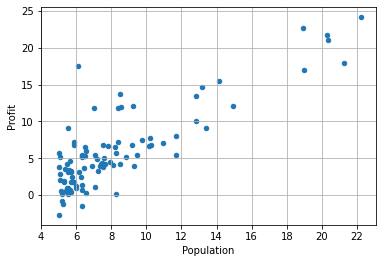

In [5]:
data.sort_values("Population", inplace=True)
max_ = data["Population"].max()
min_ = data["Population"].min()
def plot_data(data, max_, min_):
    step = (max_-min_)/10
    ticks = list(range(int(min_-1),int(max_+1),2))
    data.plot.scatter(x = "Population", y = "Profit", xticks=ticks)
    plt.grid()
# Zyski zdają się wzrastać wraz z populacją
plot_data(data, max_, min_)

###### Ex. 3. In order to make the cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.

In [6]:
data.insert(0,"Thetas",1)

In [7]:
data.head()

,Thetas,Population,Profit
74,1,5.0269,-2.6807
77,1,5.0365,5.7014
9,1,5.0546,3.8166
89,1,5.0594,2.8214
46,1,5.0702,5.1337


###### Ex. 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2). Check with the head function if your implementation is correct:

In [8]:
X = data[["Thetas",'Population']]
y = pd.DataFrame(data["Profit"])
X.head(3)

,Thetas,Population
74,1,5.0269
77,1,5.0365
9,1,5.0546


In [9]:
y.head(3)

,Profit
74,-2.6807
77,5.7014
9,3.8166


In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

###### Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [11]:
theta = np.array([0,0])

def compute_cost(X, y, theta_):
    m = X.shape[0]
    val = np.sum(np.square(np.sum(np.multiply(theta_,X),axis=1) - y)) / (2 * m)
    return val

In [12]:
compute_cost(X, y, theta)

32.07273387745567

###### Ex. 7 Please implement the gradient descent algorithm:
the function returns optimized values θ and a vector of the cost function value for each iteration

In [13]:
def simple_gradient_helper(X, y, theta, alpha):
    m = X.shape[0]
    core = np.sum(np.multiply(theta,X),axis=1)-y
    cost = compute_cost(X,y,theta)
    thetas = []
    for nr in range(len(theta)):
        thetas.append(calc_theta_val(nr,theta, alpha,X,core,m))
    theta = np.array(thetas)
    return theta, cost

def calc_theta_val(nr,theta, alpha,X,core,m):
    if nr == 0:
        return theta[0]-alpha*np.sum(core)/m
    else:
        return theta[nr]-alpha*np.sum(np.multiply(core,X[:,nr]))/m

def simple_gradient(X, y, theta, alpha, it):
    _, curr_cost = simple_gradient_helper(X, y, theta, alpha)
    costs = [curr_cost]
    thetas = [theta]
    for _ in range(it):
        curr_theta, curr_cost = simple_gradient_helper(X, y, thetas[-1], alpha)
        costs.append(curr_cost)
        thetas.append(curr_theta)
    return thetas, costs
        
        

In [14]:
alpha = 0.01
it = 1000
theta = np.array([1,1])

###### Ex. 8 Please calculate the optimal parameters for the dataset.

In [15]:
# theta, cost = simple_gradient_helper(X, y, theta, alpha)
thetas, costs = simple_gradient(X, y, theta, alpha,it)

In [16]:
theta_0, theta_1 = thetas[-1]
theta_0, theta_1


(-3.0948152578280927, 1.1125679596833007)

###### Ex. 9 Please calculate the cost function for the given (zad.8) θ.

In [17]:
costs[-1]

4.535588477324376

###### Ex. 10 Plot the regression function and our dataset.

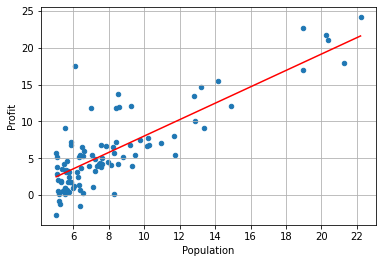

In [18]:
plot_data(data, max_, min_)
def line(theta_0, theta_1,x):
    return theta_0 + theta_1 * x
val_start = line(theta_0, theta_1, min_)
val_end = line(theta_0, theta_1, max_)
plt.plot([min_, max_], [val_start,val_end],'r-')

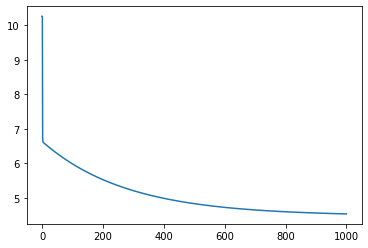

In [19]:
plt.plot(costs)

In [20]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# PART 2

###### Ex. 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [21]:
data2 = data2-data2.mean()
data2 = data2/data2.std()

###### Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

In [22]:
# 3
data2.insert(0,"Thetas",1)

In [23]:
#4
X = data2[["Thetas",'Size','Bedrooms']]
y = pd.DataFrame(data2["Price"])
X.head(3)

,Thetas,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675


In [24]:
#5,6
X = np.matrix(X.values)
y = np.matrix(y.values)

In [25]:
theta = np.array([0,0,0])
compute_cost(X, y, theta)

0.48936170212765967

In [26]:
#7,8
thetas, costs = simple_gradient(X, y, theta, alpha,it)
thetas[-1]

array([-1.10862856e-16,  8.78503652e-01, -4.69166570e-02])

In [27]:
# 9
cost = costs[-1]

In [28]:
# 10
def plane_val(x,theta):
    return theta[0] + theta[1]*x[0]+theta[2]*x[1]
X = X[:,1:]

In [29]:
X1, X2 = np.meshgrid(X[:,0],X[:,1])

In [37]:
Z = np.zeros(X1.shape)
for x_ind in range(X1.shape[0]):
    for y_ind in range(X2.shape[1]):
        x1 = X1[x_ind][y_ind]
        x2 = X2[x_ind][y_ind]
        Z[x_ind][y_ind] = plane_val((x1,x2),thetas[-1])

In [38]:
from mpl_toolkits.mplot3d import Axes3D

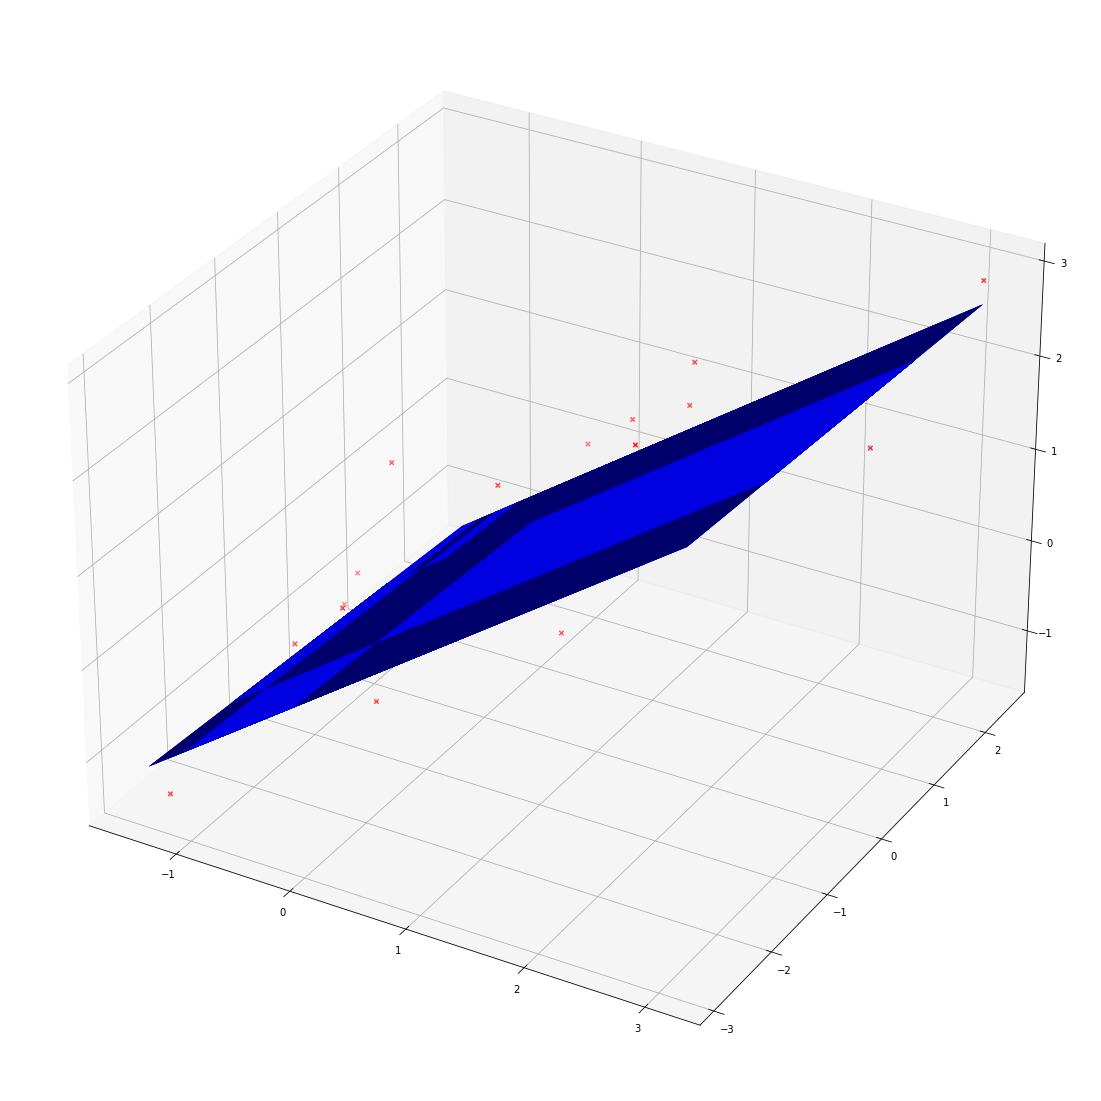

In [39]:
X1 = np.squeeze(np.asarray(X1))
X2 = np.squeeze(np.asarray(X2))
Z = np.array(Z)

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y,marker="x", c="red")
ax.plot_surface(X1,X2,Z,color="blue")
plt.show()

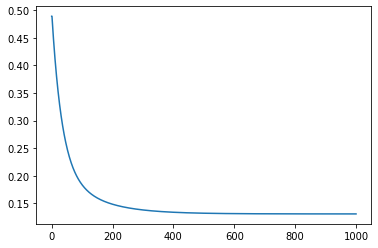

In [40]:
# 11
plt.plot(costs)

# PART 3

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\ignsz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [65]:
boston_X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [66]:
boston_X -= boston_X.mean(axis=0)
boston_X /= boston_X.std(axis=0)
boston_Y -= boston_Y.mean(axis=0)
boston_Y /= boston_Y.std(axis=0)

###### Ex. 1. Divide the database into training and testing.

In [67]:
x_train, x_test, y_train, y_test = train_test_split(boston_X, boston_Y,test_size=0.3)

###### Ex. 2. According to the above example, please implement linear regression model for the dataset. Please calculate the statistical metrics for the model including MSE and R2?

In [68]:
reg_LinReg =linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
names = ("reg_ElNet",'reg_Lasso','reg_Ridge',"reg_LinReg")
methods = (reg_ElNet,reg_Lasso,reg_Ridge,reg_LinReg)
for regr, name in zip(methods,names):
    regr.fit(x_train, y_train)
    y_predicted = regr.predict(x_test)
    error = np.mean((regr.predict(x_test) - y_test) ** 2)
    print(f"Method: {name}")
    print("Residual sum of squares (MSE): {}".format(error))
    ssr = np.sum((regr.predict(x_test) - y_test) ** 2)
    mean_ = y_test.mean()
    sst = np.sum((mean_ - y_test) ** 2)
    R2 = 1 - ssr/sst
    print("R2 = ", R2,"\n")
# pod kątem R2 najlepiej wypada: Lasso
# pod kątem MSE najlepiej wypada: Ridge

Method: reg_ElNet
Residual sum of squares (MSE): 0.42023084478254036
R2 =  0.529667782352933 

Method: reg_Lasso
Residual sum of squares (MSE): 0.89767216416155
R2 =  -0.0046957402868050835 

Method: reg_Ridge
Residual sum of squares (MSE): 0.2594069702273006
R2 =  0.7096656347459478 

Method: reg_LinReg
Residual sum of squares (MSE): 0.2600692212697884
R2 =  0.7089244278466458 



###### Ex. 3. Plot the linear regression for each atribute in the Boston dataset. Iterative or using subplots.

###### Additionally Compare the linear regression models (Linear Regression, Lasso, Ridge, ElasticNet) based on the mean error rate. 

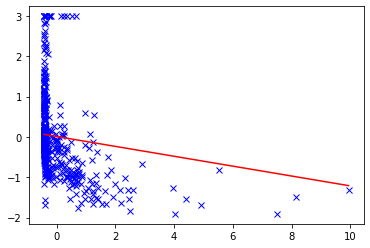

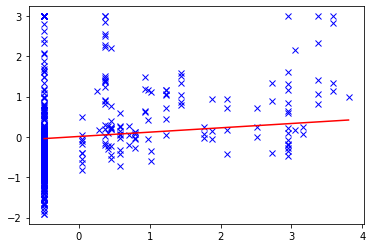

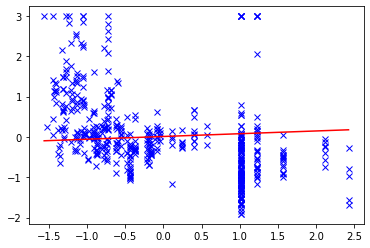

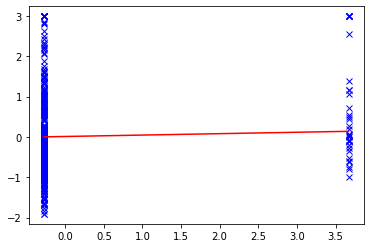

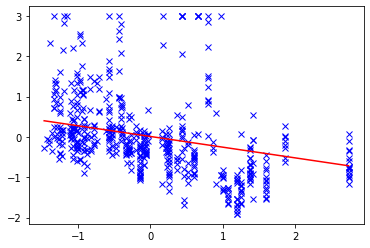

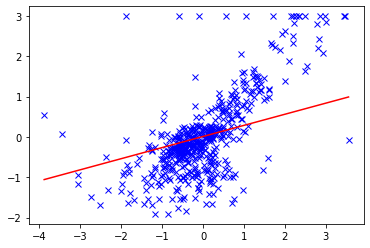

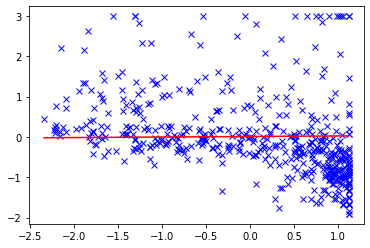

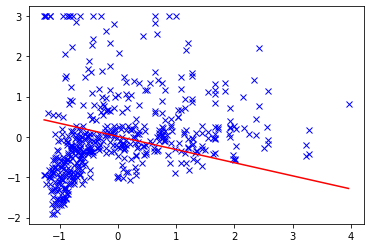

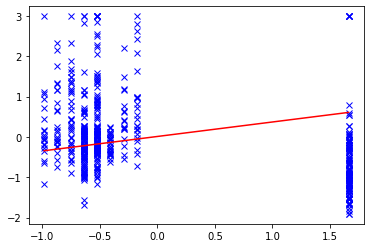

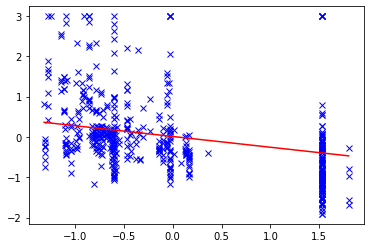

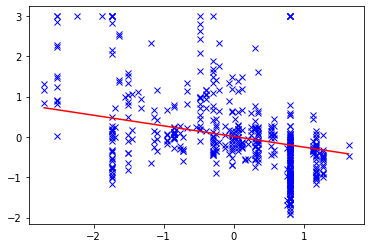

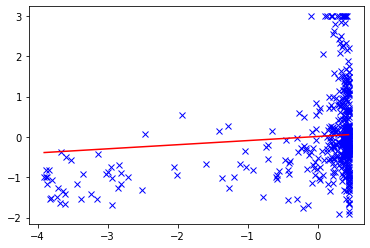

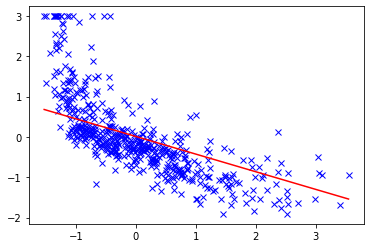

In [69]:
for nr in range(boston_X.shape[1]):
    xs = boston_X[:,nr]
    max_ = xs.max()
    min_ = xs.min()
    plt.plot(xs,boston_Y,'bx')
    th0 = regr.intercept_
    th1 = regr.coef_[nr]
    val_start = line(th0, th1, min_)
    val_end = line(th0, th1, max_)
    plt.plot([min_,max_],[val_start,val_end],'r-')
    plt.show()

